In [1]:
using BioSimulator
using Plots

In [2]:
using DataFrames
using CSV

# E Projection Algorithm

In [2]:
model1 = Network("E Algorithm")
model1 <= Species("X1", 2)
model1 <= Species("X2", 20)
model1 <= Species("X3", 27)

[ Model: E Algorithm ]
  no. species:    3
  no. reactions:  0

In [3]:
model1 <= Reaction("breaking_X1", 1, "X1 --> X2")
model1 <= Reaction("breaking_X2", 1, "X2 --> X1")

[ Model: E Algorithm ]
  no. species:    3
  no. reactions:  2

┌ Warning: Attribute alias `yerrorbar` detected in the user recipe defined for the signature (::Array{SamplePath{Int64,2,Array{Array{Int64,1},1},Array{Float64,1}},1}). To ensure expected behavior it is recommended to use the default attribute `yerror`.
└ @ Plots /home/satwik/.julia/packages/Plots/SIQaY/src/pipeline.jl:15


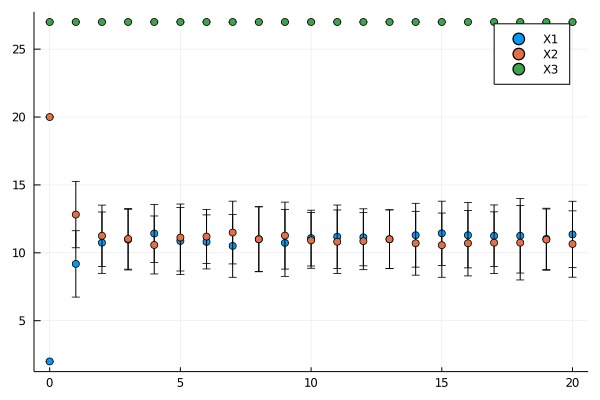

In [4]:
state, model = parse_model(model1::Network)
number = 71
result = simulate(state, model, Direct(),tfinal = 20.0, ntrials=number)
plot(result,label=["X1" "X2" "X3"])

In [6]:
df = DataFrame(result)
df

,trial,t,X1,X2,X3
,Int64,Float64,Int64,Int64,Int64
1,1,0.0,2,20,27
2,1,0.0701245,3,19,27
3,1,0.0767176,4,18,27
4,1,0.0793626,5,17,27
5,1,0.0831778,6,16,27
6,1,0.103366,7,15,27
7,1,0.18644,8,14,27
8,1,0.193722,9,13,27
9,1,0.216772,10,12,27


In [8]:
df[31637,:]

,trial,t,X1,X2,X3
,Int64,Float64,Int64,Int64,Int64
31637,71,19.9911,17,5,27


In [11]:
CSV.write("simulation_results.csv",df)

"simulation_results.csv"

# M Projection reaction network

In [14]:
model1 = Network("M Algorithm")
model1 <= Species("X1", 11)
model1 <= Species("X2", 11)
model1 <= Species("X3", 27)
model1 <= Species("θ1", 3)
model1 <= Species("θ2", 5)

[ Model: M Algorithm ]
  no. species:    5
  no. reactions:  0

In [15]:
model1 <= Reaction("reaction_theta1", 11, "0 --> θ1 + θ1")
model1 <= Reaction("reaction_theta1r", 1, "θ1 + θ1 --> 0")
model1 <= Reaction("reaction_theta2", 11, "0 --> θ1 + θ2")
model1 <= Reaction("reaction_theta2r", 1, "θ1 + θ2 --> 0")
model1 <= Reaction("reaction_theta3", 27, "0 --> θ2 + θ2")
model1 <= Reaction("reaction_theta3r", 1, "θ2 + θ2 --> 0")

[ Model: M Algorithm ]
  no. species:    5
  no. reactions:  6

In [12]:
model1 <= Reaction("breaking_X1", 1, "X1 --> X1 + θ1 + θ1")
model1 <= Reaction("reaction_theta1", 1, "θ1 + θ1 --> 0")
model1 <= Reaction("breaking_X2", 1, "X2 --> X2 + θ1 + θ2")
model1 <= Reaction("reaction_X3", 1, "θ1 + θ2 --> 0")
model1 <= Reaction("breaking_X3", 1, "X3 --> X3 + θ2 + θ2")
model1 <= Reaction("reaction_theta2", 1, "θ2 + θ2 --> 0")

[ Model: M Algorithm ]
  no. species:    5
  no. reactions:  6

┌ Warning: Attribute alias `yerrorbar` detected in the user recipe defined for the signature (::Array{SamplePath{Int64,2,Array{Array{Int64,1},1},Array{Float64,1}},1}). To ensure expected behavior it is recommended to use the default attribute `yerror`.
└ @ Plots /home/satwik/.julia/packages/Plots/SIQaY/src/pipeline.jl:15


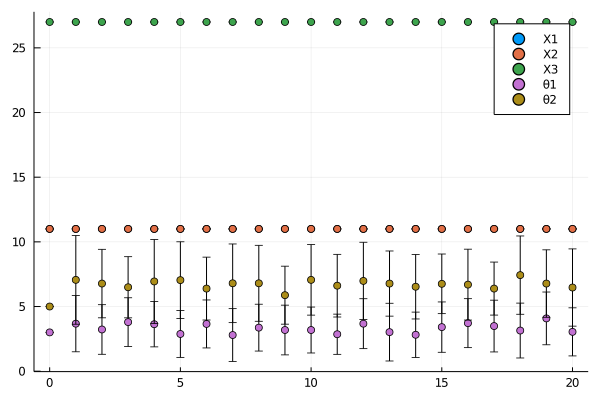

In [16]:
state, model = parse_model(model1::Network)
number = 49
result = simulate(state, model, Direct(),tfinal = 20.0, ntrials=number)
plot(result,label=["X1" "X2" "X3" "θ1" "θ2"])

In [32]:
result

49-element Array{SamplePath{Int64,2,Array{Array{Int64,1},1},Array{Float64,1}},1}:
 t: [0.0, 0.01556835776680312, 0.024881079070510896, 0.02944831557214116, 0.03507886314204262, 0.03929503800644993, 0.045903207066096484, 0.049476755189016015, 0.06009301679644021, 0.06018378025504427  …  19.90985958766598, 19.910154797702972, 19.914094006468336, 19.935389080602057, 19.948706159064614, 19.95469201051168, 19.965494654754764, 19.994702895314905, 19.99648538495642, 20.0]
x: [[11, 11, 27, 3, 5], [11, 11, 27, 3, 7], [11, 11, 27, 4, 8], [11, 11, 27, 4, 6], [11, 11, 27, 5, 7], [11, 11, 27, 7, 7], [11, 11, 27, 6, 6], [11, 11, 27, 8, 6], [11, 11, 27, 6, 6], [11, 11, 27, 5, 5]  …  [11, 11, 27, 2, 10], [11, 11, 27, 2, 8], [11, 11, 27, 2, 6], [11, 11, 27, 1, 5], [11, 11, 27, 3, 5], [11, 11, 27, 4, 6], [11, 11, 27, 5, 7], [11, 11, 27, 5, 9], [11, 11, 27, 7, 9], [11, 11, 27, 7, 9]]
 t: [0.0, 0.006872106150334405, 0.007644085421902418, 0.04297225058573606, 0.08268267005747221, 0.1001362366106025, 0.1106

# EM Algorithm

In [ ]:
model1 = Network("EM Algorithm")
model1 <= Species("X1", 1)
model1 <= Species("X2", 23)
model1 <= Species("X3", 25)
model1 <= Species("θ1", 3)
model1 <= Species("θ2", 5)

In [ ]:
model1 <= Reaction("breaking_X1", 1, "X1 --> X1 + θ1 + θ1")
model1 <= Reaction("reaction_theta1", 1, "θ1 + θ1 --> 0")
model1 <= Reaction("breaking_X2", 1, "X2 --> X2 + θ1 + θ2")
model1 <= Reaction("reaction_X3", 1, "θ1 + θ2 --> 0")
model1 <= Reaction("breaking_X3", 1, "X3 --> X3 + θ2 + θ2")
model1 <= Reaction("reaction_theta2", 1, "θ2 + θ2 --> 0")
model1 <= Reaction("reaction_X1", 1, "X1 + θ2 --> X2 + θ2")
model1 <= Reaction("reaction_X2", 1, "X2 + θ1 --> X1 + θ1")

In [ ]:
state, model = parse_model(model1::Network)
number = 10
result = simulate(state, model, Direct(),tfinal = 10.0, ntrials=number)
plot(result,label=["X1" "X2" "X3" "θ1" "θ2"])

In [24]:
println("Avg: X1")
println(sum(result[1][1,:])/length(result[1][1,:]))
println("Avg: X2")
println(sum(result[1][2,:])/length(result[1][2,:]))
println("Avg: X3")
println(sum(result[1][3,:])/length(result[1][3,:]))
println("Avg: θ1")
println(sum(result[1][4,:])/length(result[1][4,:]))
println("Avg: θ2")
println(sum(result[1][5,:])/length(result[1][5,:]))

Avg: X1
8.535328753680078
Avg: X2
15.464671246319922
Avg: X3
25.0
Avg: θ1
6.775760549558391
Avg: θ2
9.8846908734053


# A-B-N reaction network

In [2]:
model1 = Network("Political Soup")
model1 <= Species("A", 50)
model1 <= Species("B", 50)
model1 <= Species("N", 0)

[ Model: Political Soup ]
  no. species:    3
  no. reactions:  0

In [3]:
model1 <= Reaction("making_N", 0.01, "A + B --> N + N")
model1 <= Reaction("making_A", 0.001, "A + N --> A + A")
model1 <= Reaction("making_B", 0.001, "B + N --> B + B")

[ Model: Political Soup ]
  no. species:    3
  no. reactions:  3

In [4]:
state, model = parse_model(model1::Network)

([50, 50, 0], Well-Mixed Reaction System
ReactionStruct
ReactionStruct
ReactionStruct)

┌ Warning: Attribute alias `yerrorbar` detected in the user recipe defined for the signature (::Array{SamplePath{Int64,2,Array{Array{Int64,1},1},Array{Float64,1}},1}). To ensure expected behavior it is recommended to use the default attribute `yerror`.
└ @ Plots /home/satwik/.julia/packages/Plots/SIQaY/src/pipeline.jl:15


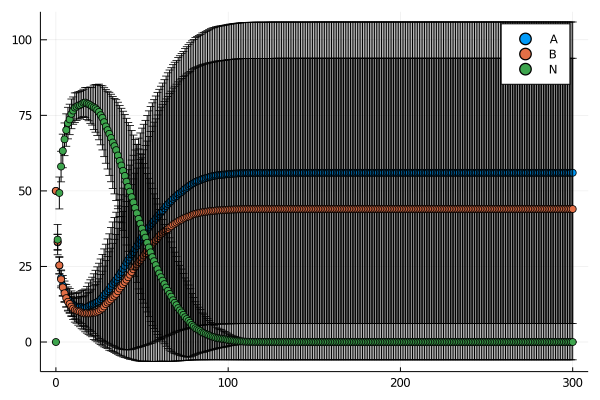

In [5]:
result = simulate(state, model, Direct(),tfinal = 300, ntrials=100)
plot(result,label=['A' 'B' 'N'])

| Rate of N      | Rate of A    | Rate of B    | Initial N      | Initial A    | Initial B    | Result       | 
| :------------: | :----------: | :----------: | :------------: | :----------: | :----------: | :----------- |
|  0.01          |   0.001      |    0.001     |       0        |    50        |   50         |N peaks, but goes to zero
|  0.001         |   0.01       |    0.01      |       0        |    50        |   50         |N almost stays zero
|  0.01          |   0.01       |    0.01      |       0        |    50        |   50         |N peaks, but goes to zero
|                |              |              |                |              |              |              | 
|                |              |              |                |              |              |              | 
|                |              |              |                |              |              |              | 
|                |              |              |                |              |              |              | 
|                |              |              |                |              |              |              | 

In [ ]:
m

# Michealis-Menten reaction

In [6]:
model = Network("Michaelis-Menten")
model <= Species("S", 301)
model <= Species("E", 130)
model <= Species("SE", 0)
model <= Species("P", 0)

[ Model: Michaelis-Menten ]
  no. species:    4
  no. reactions:  0

In [7]:
model <= Reaction("dimerization", 0.00166, "S + E --> SE")
model <= Reaction("dissociation", 0.0001, "SE --> S + E")
model <= Reaction("conversion", 0.1, "SE --> P + E")

[ Model: Michaelis-Menten ]
  no. species:    4
  no. reactions:  3

In [8]:
state, model = parse_model(model::Network)

([301, 130, 0, 0], Well-Mixed Reaction System
ReactionStruct
ReactionStruct
ReactionStruct)

In [9]:
result = simulate(state, model, Direct(),tfinal = 20.0)#, ntrials=4)

t: 399-element Array{Float64,1}:
  0.0
  0.029462264532863172
  0.06408715317540577
  0.08025733412172636
  0.10998375179443241
  0.12148281856377913
  0.14908676507252297
  0.1819297346518942
  0.20776328159806395
  0.2101120099467865
  0.2407661081163485
  0.27769901570385447
  0.27888207923129077
  ⋮
 19.24279867228245
 19.30235765103809
 19.306392864685105
 19.591521231371487
 19.59875170652016
 19.678786651013784
 19.75117506608865
 19.79546525150474
 19.799960787725098
 19.926065161399478
 19.9657346221266
 20.0
x: 399-element Array{Array{Int64,1},1}:
 [301, 130, 0, 0]
 [300, 129, 1, 0]
 [299, 128, 2, 0]
 [298, 127, 3, 0]
 [297, 126, 4, 0]
 [296, 125, 5, 0]
 [295, 124, 6, 0]
 [294, 123, 7, 0]
 [293, 122, 8, 0]
 [292, 121, 9, 0]
 [291, 120, 10, 0]
 [290, 119, 11, 0]
 [289, 118, 12, 0]
 ⋮
 [71, 57, 73, 157]
 [71, 58, 72, 158]
 [71, 59, 71, 159]
 [70, 58, 72, 159]
 [69, 57, 73, 159]
 [69, 58, 72, 160]
 [69, 59, 71, 161]
 [68, 58, 72, 161]
 [68, 59, 71, 162]
 [68, 60, 70, 163]
 [68, 

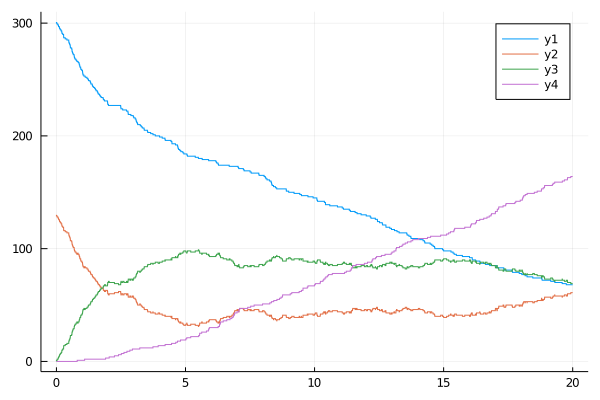

In [10]:
plot(result)

In [2]:
# initialize
model = Network("BDI")

# species definitions; add components with <=
model <= Species("X", 5)

# reaction definitions
model <= Reaction("birth", 2.0, "X --> X + X")
model <= Reaction("death", 1.0, "X --> 0")
model <= Reaction("immigration", 0.5, "0 --> X")

[ Model: BDI ]
  no. species:    1
  no. reactions:  3

In [3]:
result = simulate(model, algorithm=Direct, time=4.0, epochs=40, trials=10)

plot(meantrajectory(result), freqhistogram(result, 4.0), layout = 2, size   = (800,400))

LoadError: MethodError: no method matching simulate(::Network; algorithm=Direct, time=4.0, epochs=40, trials=10)
Closest candidates are:
  simulate(::Network, !Matched::BioSimulator.SimulationAlgorithm; tfinal, rates_cache, save_points, save_function, ntrials) at /home/satwik/.julia/packages/BioSimulator/Ko5Gk/src/simulate.jl:40 got unsupported keyword arguments "algorithm", "time", "epochs", "trials"
  simulate(::Any, !Matched::Any, !Matched::BioSimulator.SimulationAlgorithm; tfinal, rates_cache, save_points, save_function, ntrials) at /home/satwik/.julia/packages/BioSimulator/Ko5Gk/src/simulate.jl:87 got unsupported keyword arguments "algorithm", "time", "epochs", "trials"
  simulate(::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any) at /home/satwik/.julia/packages/BioSimulator/Ko5Gk/src/simulate.jl:100 got unsupported keyword arguments "algorithm", "time", "epochs", "trials"

In [16]:
# initialize
network = Network("BDI")

# species definitions; add components with <=
network <= Species("X", 5)

# reaction definitions
network <= Reaction("birth", 2.0, "X --> X + X")
network <= Reaction("death", 1.0, "X --> 0")
network <= Reaction("immigration", 0.5, "0 --> X")

[ Model: BDI ]
  no. species:    1
  no. reactions:  3

In [27]:
state,model = parse_model(network::Network)

([5], Well-Mixed Reaction System
ReactionStruct
ReactionStruct
ReactionStruct)

In [32]:
simulate(state, model, algname=Direct(),tfinal = 0.0,rates_cache = HasRates)

LoadError: MethodError: no method matching simulate(::Vector{Int64}, ::BioSimulator.ReactionSystem{Vector{Float64}, DGVector{DGLazy}}; algname=Direct(), tfinal=0.0, rates_cache=HasRates)
[0mClosest candidates are:
[0m  simulate(::Any, ::Any, [91m::BioSimulator.SimulationAlgorithm[39m; tfinal, rates_cache, save_points, save_function, ntrials) at /home/aman/.julia/packages/BioSimulator/Ko5Gk/src/simulate.jl:87[91m got unsupported keyword argument "algname"[39m
[0m  simulate(::Any, ::Any, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m) at /home/aman/.julia/packages/BioSimulator/Ko5Gk/src/simulate.jl:100[91m got unsupported keyword arguments "algname", "tfinal", "rates_cache"[39m

In [5]:
"""
```
parse_model(network::Network)
```

Construct a `state <: Vector{Int}` and `model <: ReactionSystem` from a `Network` object.

Use this in `simulate` to avoid constructing internal data structures over multiple samples.
"""
function parse_model(network::Network)
    state = [ x.population for (key, x) in species_list(network) ]
    model = ReactionSystem(network)

    return state, model
end

##### user-facing interface #####

"""
```
simulate(network::Network, algname::SimulationAlgorithm;
            [tfinal = 0.0],
            [rates_cache = HasRates],
            [save_points = nothing],
            [save_function = save_state],
            [ntrials = nothing])
```

Simulate a `Network` of interacting populations.
Note that simulations may terminate early if the cumulative intensity reaches `0` (that is, reaching an absorbing state).

#### Keyword Arguments

- `tfinal`: The final simulation time.
- `rates_cache`: Indicates the type of information stored in a `rates` cache. If `HasRates` is chosen, store the actual rates. If `HasSums` is chosen, store partial sums of the `rates`. This effectively toggles between linear and binary searches, provided the algorithm supports the option.
- `save_points`: An indexable collection indicating time points to sample and record system state. The default `nothing` forces saving after every reaction event.
- `save_function`: A three argument function that maps the three arguments `(simulator, state, model)` to data recorded in a `SamplePath`. Default behavior is to record each species.
- `ntrials`: Specifies the number of times to simulate the given model. The default `nothing` generates a single sample path.
"""
function simulate(network::Network, algname::SimulationAlgorithm;
    tfinal=0.0,
    rates_cache = HasRates,
    save_points = nothing,
    save_function::funcT = save_state,
    ntrials = nothing
    ) where funcT <: Function
    # build the internal representation of our stochastic process
    initial_state, model = parse_model(network)

    # feedforward down the chain...
    return simulate(initial_state, model, algname, tfinal, rates_cache, save_points, save_function, ntrials)
end

"""
```
simulate(state, model, algname::SimulationAlgorithm;
            [tfinal = 0.0],
            [rates_cache = HasRates],
            [save_points = nothing],
            [save_function = save_state],
            [ntrials = nothing])
```

Simulate a `model` with the given initial `state`.
Note that simulations may terminate early if the cumulative intensity reaches `0` (that is, reaching an absorbing state).

#### Arguments

For well-mixed systems:

- `state`: A `Vector{Int}` constructed by `parse_model`.
- `model`: A `ReactionSystem` type constructed by `parse_model`.

For lattice-based systems:

- `state`: A `Lattice` type whose topology comptabile is compatible with `model`.
- `model`: An `InteractingParticleSystem` type built from `@enumerate_with_sclass`.

#### Keyword Arguments

- `tfinal`: The final simulation time.
- `rates_cache`: Indicates the type of information stored in a `rates` cache. If `HasRates` is chosen, store the actual rates. If `HasSums` is chosen, store partial sums of the `rates`. This effectively toggles between linear and binary searches, provided the algorithm supports the option.
- `save_points`: An indexable collection indicating time points to sample and record system state. The default `nothing` forces saving after every reaction event.
- `save_function`: A three argument function that maps the three arguments `(simulator, state, model)` to data recorded in a `SamplePath`. Default behavior is to store population counts for well-mixed systems or `Configuration` objects for lattice-based systems.
- `ntrials`: Specifies the number of times to simulate the given model. The default `nothing` generates a single sample path.
"""
function simulate(initial_state, model, algname::SimulationAlgorithm;
    tfinal = 0.0,
    rates_cache = HasRates,
    save_points = nothing,
    save_function::funcT = save_state,
    ntrials = nothing
    ) where funcT <: Function
    # feedforward down the chain...
    return simulate(initial_state, model, algname, tfinal, rates_cache, save_points, save_function, ntrials)
end

##### internals #####

function simulate(initial_state, model, algname, tfinal, rates_cache, save_points, save_function, ntrials)
    # copy state
    state = copy(initial_state)

    # build the simulator
    simulator = build_simulator(algname, state, model, rates_cache)
    # TODO: figure out a way of initializing so that output is built correctly
    initialize!(simulator, state, model, tfinal)

    # build the output data
    output = build_output(save_function, simulator, state, model, ntrials)

    # feedforward down the chain...
    simulate!(simulator, state, initial_state, model, tfinal, output, save_points, save_function, ntrials)
end

# case: single trajectory
function simulate!(simulator, state, initial_state, model, tfinal, output, save_points, save_function, ::Nothing)
    initialize_datastructs!(state, initial_state, model)
    simulate!(simulator, state, model, tfinal, output, save_points, save_function)

    return output
end

# case: ensemble simulation
function simulate!(simulator, state, initial_state, model, tfinal, output, save_points, save_function, ntrials::Integer)
    for k in 1:ntrials
        initialize_datastructs!(state, initial_state, model)
        sample_path = output[k]
        simulate!(simulator, state, model, tfinal, sample_path, save_points, save_function)
    end

    return output
end

function simulate!(simulator, state, model, tfinal, output, save_points, save_function)
    initialize!(simulator, state, model, tfinal)

    in_timespan = simulator.t < tfinal
    transient = cumulative_intensity(simulator) > 0
    running = in_timespan && transient

    while running
        tnew = get_new_time(simulator)

        if tnew <= tfinal
            step!(simulator, state, model)
        else
            simulator.t = tfinal
        end
        # update output
        t = simulator.t
        update_samplepath!(save_function, output, simulator, t, state, model, save_points)

        # update flags
        in_timespan = simulator.t < tfinal
        transient = cumulative_intensity(simulator) > 0
        running = in_timespan && transient
    end

    # add end point in case of extinction
    if !transient
        update_samplepath!(save_function, output, simulator, tfinal, state, model, save_points)
    end

    return output
end

##### temporary hacks

initialize_datastructs!(state, initial_state, model) = copyto!(state, initial_state)

function initialize_datastructs!(lattice::Lattice, initial_lattice::Lattice, model::InteractingParticleSystem)
    # copy fields for lattice...
    empty!(lattice.site)
    for s in initial_lattice.site
        new_site = Site(s.label, State(s.state.ptype), tuple(s.coord...))
        push!(lattice.site, new_site)
    end

    empty!(lattice.coord_order)
    foreach(s -> push!(lattice.coord_order, s), lattice.site)
    sort!(lattice.coord_order,
    alg = Base.Sort.DEFAULT_STABLE,
    by = coordinates,
    lt = <)

    foreach(nb -> empty!(nb), lattice.neighbors)

    # unpack information
    number_init = number_sites(lattice)
    site = lattice.site
    nbtype = topology(lattice)
    enum = model.enumeration
    class = enum.class
    isactive = enum.isactive
    pair_to_classes = enum.pair_to_classes
    dummy_composition = enum.dummy_composition

    # make sure sample classes are empty
    foreach(c -> empty!(c), class)

    # add missing open sites
    for i in 1:number_init
        x = site[i]
        for coord in eachdir(nbtype, x)
            if !istracked(lattice, coord)
                y = spawn_new_site(lattice, coord)
                add_site!(lattice, y)
            end
        end
    end

    # build neighborhoods
    build_neighborhoods!(nbtype, lattice)

    # assign sites to classes in the enumeration
    for x in site
        # build the neighborhood composition around x
        build_composition!(dummy_composition, lattice, x)

        # what sample classes does x belong to?
        l = get_ptype(x)
        k = get_nbclass_index(enum, dummy_composition)

        if isactive[l]
            classes = pair_to_classes[(l,k)]

            # add x to each assigned class
            for s in classes
                add_class_member!(class[s], x)
            end
        end

        # change the neighborhood class of x
        change_neighbor_class!(x, k)
    end

    # clean up
    fill!(dummy_composition, 0)
    sort!(lattice.coord_order,
    alg = Base.Sort.DEFAULT_STABLE,
    by = coordinates,
    lt = <)

    return nothing
end

LoadError: syntax: extra token "help" after end of expression

In [ ]:
# dirty hacks
get_number_jumps(model::ReactionSystem) = length(model.reactions)
get_number_jumps(model::InteractingParticleSystem) = length(model.reactions)
get_number_jumps(model::Vector{T}) where T = length(model)
get_number_species(state::Lattice) = length(state.types)
get_number_species(state::Vector{T}) where T = length(state)

abstract type SimulationAlgorithm end

"""
```
Direct()
```

Gillespie's Direct Method.

#### References

- Gillespie, D.T. (1976) A general method for numerically simulating the stochastic time evolution of coupled chemical reactions. *Journal of Computational Physics*. [https://doi.org/10.1016/0021-9991(76)90041-3](https://doi.org/10.1016/0021-9991(76)90041-3)

- Gillespie, D.T. (1977) Exact stochastic simulation of coupled chemical reactions. *The Journal of Physical Chemistry*. [https://doi.org/10.1021/j100540a008](https://doi.org/10.1021/j100540a008)
"""
struct Direct <: SimulationAlgorithm end

function build_simulator(::Direct, state, model, rates_cache)
  number_jumps = get_number_jumps(model)
  algorithm = DirectMethod{rates_cache}(zeros(number_jumps), 0.0)

  return ExactSimulator(algorithm)
end

"""
```
EnhancedDirect()
```

A Direct method that uses a dependency graph.

#### References

- Marchetti L., Priami C., Thanh V.H. (2017) Simulation Algorithms for Computational Systems Biology. *Texts in Theoretical Computer Science*.
"""
struct EnhancedDirect <: SimulationAlgorithm end

function build_simulator(::EnhancedDirect, state, model, rates_cache)
  number_jumps = get_number_jumps(model)
  algorithm = EnhancedDirectMethod{HasRates}(zeros(number_jumps), 0.0)

  return ExactSimulator(algorithm)
end

"""
```
SortingDirect()
```

The sorting direct method reorders reactions to identify frequently occurring events.
This effectively reduces the search depth in selecting the next reaction.

#### References

- McCollum, J.M., Peterson, G.D., Cox, C.D., Simpson, M.L., Samatova, N.F. (2006). The sorting direct method for stochastic simulation of biochemical systems with varying reaction execution behavior. *Computational Biology and Chemistry*. [https://doi.org/10.1016/j.compbiolchem.2005.10.007](https://doi.org/10.1016/j.compbiolchem.2005.10.007).
"""
struct SortingDirect <: SimulationAlgorithm end

function build_simulator(::SortingDirect, state, model, rates_cache)
  number_jumps = get_number_jumps(model)
  algorithm = SortingDirectMethod{HasRates}(zeros(number_jumps), 0.0, collect(1:number_jumps), 1)

  return ExactSimulator(algorithm)
end

"""
```
FirstReaction()
```

A first reaction method that samples reaction events and times jointly.

#### References

- Gillespie, D.T. (1976) A general method for numerically simulating the stochastic time evolution of coupled chemical reactions. *Journal of Computational Physics*. [https://doi.org/10.1016/0021-9991(76)90041-3](https://doi.org/10.1016/0021-9991(76)90041-3)
"""
struct FirstReaction <: SimulationAlgorithm end

function build_simulator(::FirstReaction, state, model, rates_cache)
  number_jumps = get_number_jumps(model)
  algorithm = FirstReactionMethod(zeros(number_jumps), 0.0)

  return ExactSimulator(algorithm)
end

"""
```
NextReaction()
```

Gibson and Bruck's next reaction method.
Uses a priority queue to select the next reaction event and time.

#### References

- Gibson, M.A., Bruck, J. (1999) Efficient exact stochastic simulation of chemical systems with many species and many channels. *Journal of Physical Chemistry*. [https://doi.org/10.1021/jp993732q](https://doi.org/10.1021/jp993732q)
"""
struct NextReaction <: SimulationAlgorithm end

function build_simulator(::NextReaction, state, model, rates_cache)
  number_jumps = get_number_jumps(model)
  priority_queue = PQBinaryHeap{Int,Float64,ForwardOrdering}(collect(1:number_jumps), zeros(number_jumps))
  algorithm = NextReactionMethod(zeros(number_jumps), 0.0, priority_queue)

  return ExactSimulator(algorithm)
end

"""
```
RejectionSSA()
```

A rejection-based algorithm that operates on "virtual states" to accelerate simulation.

WARNING: This *implementation* is a work in progress.

#### References

- Thahn, V.H., Priami, C., Zunino, R. (2014) Efficient rejection-based simulation of biochemical reactions with stochastic noise and delays. *Journal of Chemical Physics*. [https://doi.org/10.1063/1.4896985](https://doi.org/10.1063/1.4896985)
"""
struct RejectionSSA <: SimulationAlgorithm end

function build_simulator(::RejectionSSA, state, model, rates_cache)
  number_species = length(state)
  number_jumps = get_number_jumps(model)

  interval_lo = Vector{Int}(undef, number_species)
  interval_hi = Vector{Int}(undef, number_species)
  rates = [Vector{Float64}(undef, 2) for j in 1:number_jumps]
  total_rate = Vector{Float64}(undef, 2)
  spc_dg = model.spc_graph
  rxn_dg = model.rxn_graph

  algorithm = RejectionMethod(state, model, interval_lo, interval_hi, rates, total_rate, spc_dg, rxn_dg)

  return ExactSimulator(algorithm)
end

##### tau-leaping

"""
```
TauLeapingDG2001()
```

A pure tau-leaping method using the Equation (26a) to select tau.

#### Optional Arguments

Work in progress.

#### References

- Gillespie, D.T. (2001) Approximate accelerated stochastic simulation of chemically reacting systems. *Journal of Chemical Physics*. [https://doi.org/10.1063/1.1378322](https://doi.org/10.1063/1.1378322)
"""
struct TauLeapingDG2001 <: SimulationAlgorithm end

function build_simulator(::TauLeapingDG2001, state, model, rates_cache)
  number_species = length(state)
  number_jumps = get_number_jumps(model)

  rates = zeros(number_jumps)
  total_rate = zero(eltype(rates))
  leap_formula = DG2001Eq26a(number_species, number_jumps, 0.125)

  # build closure to apply leap updates
  V = extract_net_stoichiometry(model)
  execute_leap! = ApplyLeapUpdate(forward_leap!, V)  # apply a leap update
  reverse_leap! = ApplyLeapUpdate(backward_leap!, V) # reverse a leap update

  # build closure that ensures leaps are valid
  rejection_threshold = 0.75
  proposal = copy(state)
  validate_leap! = RejectionThinning(rejection_threshold, proposal, execute_leap!, reverse_leap!)

  algorithm = PoissonLeapMethod(rates, total_rate, V, leap_formula, validate_leap!)

  return TauLeapSimulator(algorithm, number_jumps, execute_leap!)
end

"""
```
TauLeapingDGLP2003()
```

A pure tau-leaping method using the Equation (6) to select tau.

#### Optional Arguments

Work in progress.

#### References

- Gillespie, D.T., Petzold, L.R. (2003) Improved leap-size selection for accelerated stochastic simulation. *Journal of Chemical Physics*. [https://doi.org/10.1063/1.1613254](https://doi.org/10.1063/1.1613254)
"""
struct TauLeapingDGLP2003 <: SimulationAlgorithm end

function build_simulator(::TauLeapingDGLP2003, state, model, rates_cache)
  number_species = length(state)
  number_jumps = get_number_jumps(model)

  rates = zeros(number_jumps)
  total_rate = zero(eltype(rates))

  # extract stoichiometry
  V = extract_net_stoichiometry(model)

  # build leap formula
  leap_formula = DGLP2003Eq6(number_species, number_jumps, V, 0.125)

  # build closure to apply leap updates
  execute_leap! = ApplyLeapUpdate(forward_leap!, V)  # apply a leap update
  reverse_leap! = ApplyLeapUpdate(backward_leap!, V) # reverse a leap update

  # build closure that ensures leaps are valid
  rejection_threshold = 0.75
  proposal = copy(state)
  validate_leap! = RejectionThinning(rejection_threshold, proposal, execute_leap!, reverse_leap!)

  algorithm = PoissonLeapMethod(rates, total_rate, V, leap_formula, validate_leap!)

  return TauLeapSimulator(algorithm, number_jumps, execute_leap!)
end


"""
```
StepAnticipation()
```

A pure tau-leaping method using the Equation (15) to select tau.

#### Optional Arguments

Work in progress.

#### References

- Sehl, M.E., Alekseyenko, A.L., Lange, K.L. (2009) Accurate stochastic simulation via the step anticipation tau-leaping (SAL) algorithm. *Journal of Computational Biology*. [https://dx.doi.org/10.1089/cmb.2008.0249](https://dx.doi.org/10.1089/cmb.2008.0249)
"""
struct StepAnticipation <: SimulationAlgorithm end

function build_simulator(::StepAnticipation, state, model, rates_cache)
  number_species = length(state)
  number_jumps = get_number_jumps(model)

  rates = zeros(number_jumps)
  total_rate = zero(eltype(rates))

  # extract stoichiometry
  U = extract_coefficients(model)
  V = extract_net_stoichiometry(model)

  # allocate memory for derivatives
  dxdt = zeros(number_species)
  drdt = zeros(number_jumps)

  # build leap formula
  k = model.rxn_rates # note: this needs to change in the future!
  leap_formula = GenericLeapFormula(k, U, V, dxdt, drdt, 0.125)

  # build closure to apply leap updates
  execute_leap! = ApplyLeapUpdate(forward_leap!, V)  # apply a leap update
  reverse_leap! = ApplyLeapUpdate(backward_leap!, V) # reverse a leap update

  # build closure that ensures leaps are valid
  rejection_threshold = 0.75
  proposal = copy(state)
  validate_leap! = RejectionThinning(rejection_threshold, proposal, execute_leap!, reverse_leap!)

  algorithm = StepAnticipationMethod(rates, total_rate, leap_formula, validate_leap!, U, V, dxdt, drdt)

  return TauLeapSimulator(algorithm, number_jumps, execute_leap!)
end

"""
```
HybridSAL()
```

Same as `StepAnticipation()`, but defaults to `Direct()` depending on the cumulative intensity.

#### Optional Arguments

Work in progress.

#### References

- Sehl, M.E., Alekseyenko, A.L., Lange, K.L. (2009) Accurate stochastic simulation via the step anticipation tau-leaping (SAL) algorithm. *Journal of Computational Biology*. [https://dx.doi.org/10.1089/cmb.2008.0249](https://dx.doi.org/10.1089/cmb.2008.0249)
"""
struct HybridSAL <: SimulationAlgorithm end

function build_simulator(::HybridSAL, state, model, rates_cache)
  # shared information
  number_species = length(state)
  number_jumps = get_number_jumps(model)

  rates = zeros(number_jumps)
  total_rate = zero(eltype(rates))

  # exact simulator...
  algorithm = DirectMethod{rates_cache}(rates, 0.0)
  exact = ExactSimulator(algorithm)

  # tau-leaping simulator...

  # extract stoichiometry
  U = extract_coefficients(model)
  V = extract_net_stoichiometry(model)

  # allocate memory for derivatives
  dxdt = zeros(number_species)
  drdt = zeros(number_jumps)

  # build leap formula
  k = model.rxn_rates # note: this needs to change in the future!
  leap_formula = GenericLeapFormula(k, U, V, dxdt, drdt, 0.125)

  # build closure to apply leap updates
  execute_leap! = ApplyLeapUpdate(forward_leap!, V)  # apply a leap update
  reverse_leap! = ApplyLeapUpdate(backward_leap!, V) # reverse a leap update

  # build closure that ensures leaps are valid
  rejection_threshold = 0.75
  proposal = copy(state)
  validate_leap! = RejectionThinning(rejection_threshold, proposal, execute_leap!, reverse_leap!)

  algorithm = StepAnticipationMethod(rates, total_rate, leap_formula, validate_leap!, U, V, dxdt, drdt)

  tauleap = TauLeapSimulator(algorithm, number_jumps, execute_leap!)

  return HybridTauLeapSimulator(exact, tauleap)
end